**Biodata**
Nama : Diana Fitri
E-Mail : nadatalita76@gmail.com




In [101]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [102]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-10-25 07:41:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z 100%[===================>] 307.92M  12.0MB/s    in 20s     

2020-10-25 07:41:34 (15.6 MB/s) - ‘rockpaperscissors.zip.1’ saved [322873683/322873683]



In [103]:
# melakukan ekstraksi pada file zip
import zipfile,os
path=os.path.join('/', 'image_classification')
os.mkdir(path)
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/image_classification')
zip_ref.close()

FileExistsError: ignored

In [ ]:
import shutil
base_dir = '/image_classification/rockpaperscissors/'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
rock_train = os.path.join(train_dir, 'rock')
paper_train = os.path.join(train_dir, 'paper')
scissors_train = os.path.join(train_dir, 'scissors')
rock_val = os.path.join(val_dir, 'rock')
paper_val = os.path.join(val_dir, 'paper')
scissors_val= os.path.join(val_dir, 'scissors')
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(rock_train)
os.mkdir(paper_train)
os.mkdir(scissors_train)
os.mkdir(rock_val)
os.mkdir(paper_val)
os.mkdir(scissors_val)

os.listdir(base_dir)

['rock',
 'train',
 'scissors',
 'rps-cv-images',
 'val',
 'paper',
 'README_rpc-cv-images.txt']

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)
for f in train_rock_dir :
  shutil.copy(os.path.join(rock_dir, f), rock_train)
for f in train_paper_dir :
  shutil.copy(os.path.join(paper_dir, f), paper_train)
for f in train_scissors_dir :
  shutil.copy(os.path.join(scissors_dir, f), scissors_train)
for f in val_rock_dir :
  shutil.copy(os.path.join(rock_dir, f), rock_val)
for f in val_paper_dir :
  shutil.copy(os.path.join(paper_dir, f), paper_val)
for f in val_scissors_dir :
  shutil.copy(os.path.join(scissors_dir, f), scissors_val)


In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    fill_mode = 'nearest',
                    shear_range=0.2,
                    zoom_range=0.2)
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest')

In [105]:

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(75, 75),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')
 
validation_generator = val_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(75, 75),  
        batch_size=32, 
        shuffle=True,
        class_mode='categorical')


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [106]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(75, 75, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [107]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# latih model dengan model.fit 
result = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks=[cb],
      verbose=2)

print('Time Spent for Fitting model is ' + str(sum(cb.logs)) + ' detik atau ' + str(sum(cb.logs)/60) + ' menit')

Epoch 1/20
25/25 - 11s - loss: 0.9874 - accuracy: 0.5050 - val_loss: 0.8050 - val_accuracy: 0.6875
Epoch 2/20
25/25 - 11s - loss: 0.5760 - accuracy: 0.7738 - val_loss: 0.3432 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 11s - loss: 0.3599 - accuracy: 0.8687 - val_loss: 0.2790 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 11s - loss: 0.3140 - accuracy: 0.8838 - val_loss: 0.2574 - val_accuracy: 0.9000
Epoch 5/20
25/25 - 11s - loss: 0.2600 - accuracy: 0.9025 - val_loss: 0.1846 - val_accuracy: 0.9187
Epoch 6/20
25/25 - 11s - loss: 0.2420 - accuracy: 0.9100 - val_loss: 0.2396 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 11s - loss: 0.2311 - accuracy: 0.9212 - val_loss: 0.2489 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 11s - loss: 0.1340 - accuracy: 0.9588 - val_loss: 0.1244 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 11s - loss: 0.1983 - accuracy: 0.9225 - val_loss: 0.3569 - val_accuracy: 0.8500
Epoch 10/20
25/25 - 11s - loss: 0.1812 - accuracy: 0.9337 - val_loss: 0.1588 - val_accuracy: 0.9438
Epoch 11/

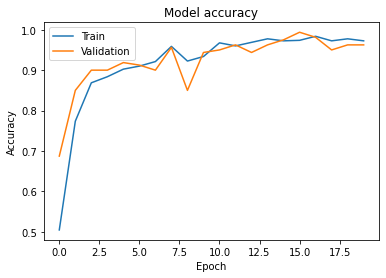

In [108]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Saving download (2).jpg to download (2) (1).jpg
download (2).jpg
Paper dengan presentase 99.00522828102112%


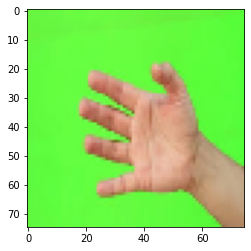

In [114]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(75,75))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  predictions = model.predict(images)
  precentage = model.predict(images/255)[0]
  print(fn)
  if predictions[0,0]!=0:
    print('Paper dengan presentase ' + str(precentage[0]*100) + "%")
  elif predictions[0,1]!=0:
    print('Rock dengan presentase ' + str(precentage[1]*100) + "%")
  else:
    print('Scissors dengan presentase ' + str(precentage[2]*100) + "%")